In [111]:
pip install numpy pandas scikit-learn matplotlib nltk seaborn wordcloud ensemble


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [112]:
import numpy as np
import pandas as pd
import nltk
import seaborn as sns

In [113]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [114]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ischy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ischy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ischy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [115]:
df = pd.read_csv('spam.csv', encoding='latin-1') #using latin-1 for proper encoding
df.sample(10)
#df.shape

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1098,ham,NO GIFTS!! You trying to get me to throw mysel...,NaN,NaN,NaN
2164,ham,"Nothing really, just making sure everybody's u...",NaN,NaN,NaN
2288,ham,Dont you have message offer,NaN,NaN,NaN
1411,ham,somewhere out there beneath the pale moon ligh...,NaN,NaN,NaN
4951,spam,"Welcome to Select, an O2 service with added be...",NaN,NaN,NaN
2089,ham,No i'm not. I can't give you everything you wa...,NaN,NaN,NaN
361,ham,Oh ok no prob..,NaN,NaN,NaN
590,spam,For ur chance to win a å£250 wkly shopping spr...,NaN,NaN,NaN
4814,ham,ÌÏ no home work to do meh...,NaN,NaN,NaN
598,ham,Will do. Was exhausted on train this morning. ...,NaN,NaN,NaN


Data Cleaning

In [116]:
#df.info()
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
#df.sample(10)

#Renaming columns
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [117]:
df['target'] = encoder.fit_transform(df['target']) #ham 0, spam 1
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [118]:
#df.isnull().sum()

In [119]:
#df.duplicated().sum() #403 duplicate values
df = df.drop_duplicates(keep='first')
df.duplicated().sum() #0 duplicate values
#df.shape

np.int64(0)

Exploratory Data Analysis

In [120]:
df['target'] .value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x277bcfd3c50>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

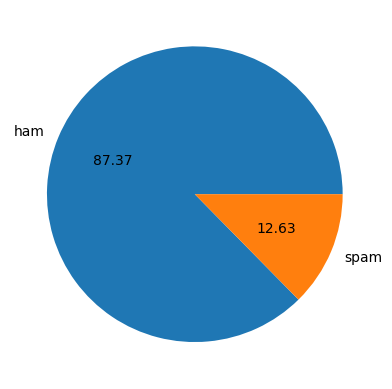

In [121]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
#Imbalanced dataset

In [122]:
df['num_char'] = df['text'].apply(len)
df['num_words'] =  df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
#df.head()

In [123]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df[['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [124]:
df[df['target'] == 0] [['num_char', 'num_words', 'num_sentences']].describe() #ham

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [125]:
df[df['target'] == 1] [['num_char', 'num_words', 'num_sentences']].describe() #spam

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_char', ylabel='Count'>

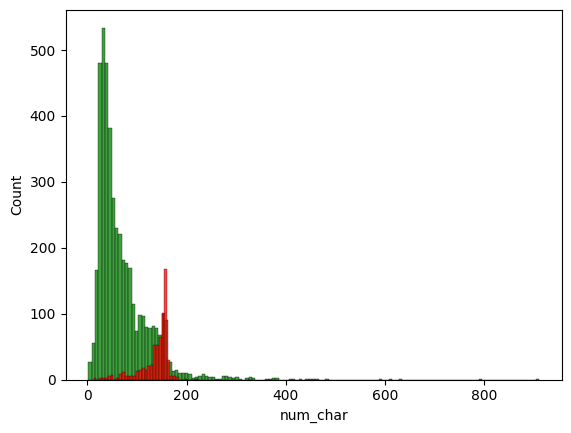

In [126]:
#Graphical view for ham/spam
sns.histplot(df[df['target'] == 0]['num_char'], color='green')
sns.histplot(df[df['target'] == 1]['num_char'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

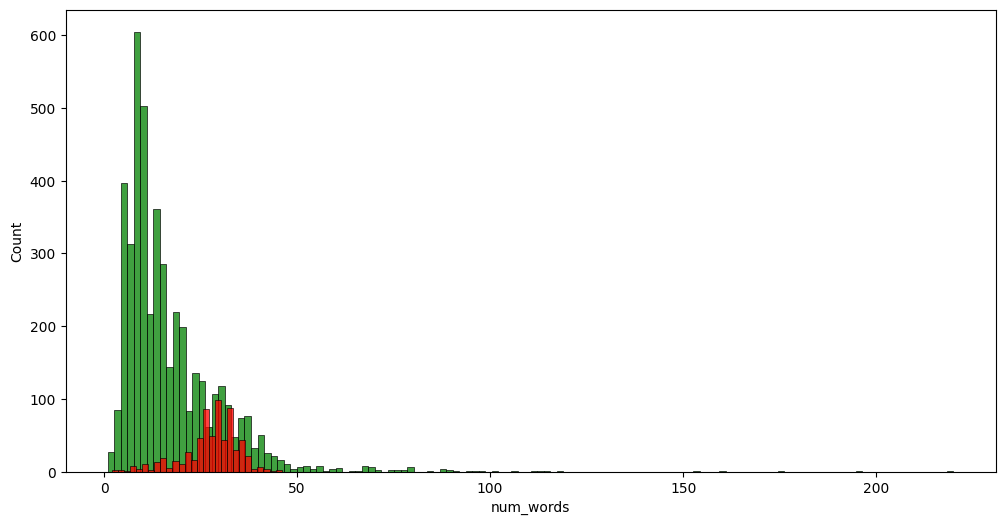

In [127]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'], color='green')
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

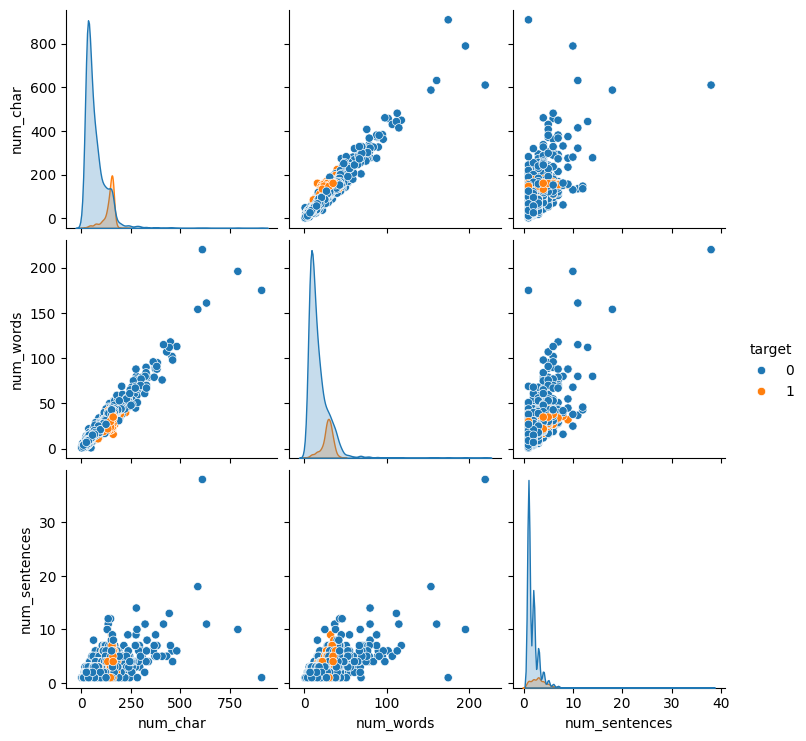

In [128]:
#Advanced visualization for graphical view
sns.pairplot(df, hue='target')

<Axes: >

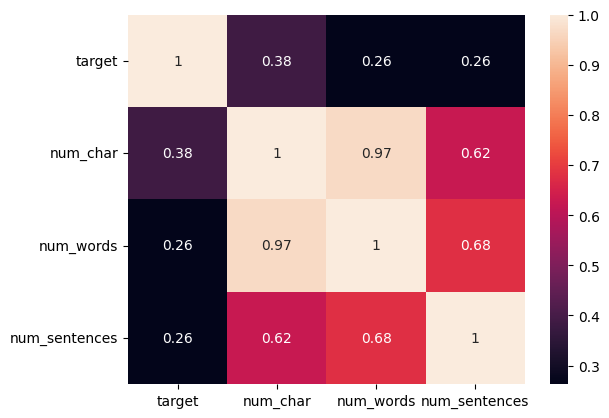

In [129]:
#Numeric column correlation
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True) 

Text Preprocessing

In [130]:
def transform_text(text):
    #Lowering case
    text = text.lower()
    
    #Tokenization
    text = nltk.word_tokenize(text)
    
    #Removing special characters
    c = []
    for char in text:
        if char.isalnum(): c.append(char)
    
    #Removing stop words and punctuation
    from nltk.corpus import stopwords
    from string import punctuation
    text = c[:]
    c.clear()
    for char in text:
        if char not in stopwords.words('english') and char not in punctuation:
            c.append(char)
    
    #Stemming
    from nltk.stem.porter import PorterStemmer
    ps = PorterStemmer()
    text = c[:]
    c.clear()
    for char in text:
        c.append(ps.stem(char))
    return " ".join(c)


In [131]:
transform_text('Hello friends, how are you doing today? I am doing fine!')

'hello friend today fine'

In [132]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Word Visibility

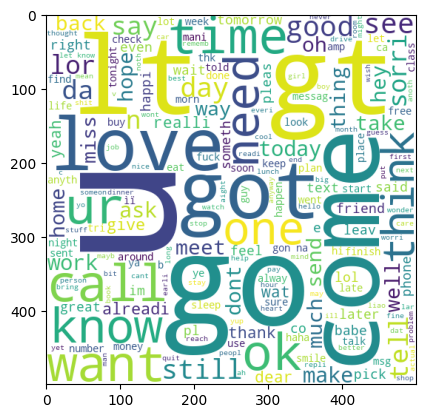

In [133]:
from wordcloud import WordCloud
#Ham word cloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

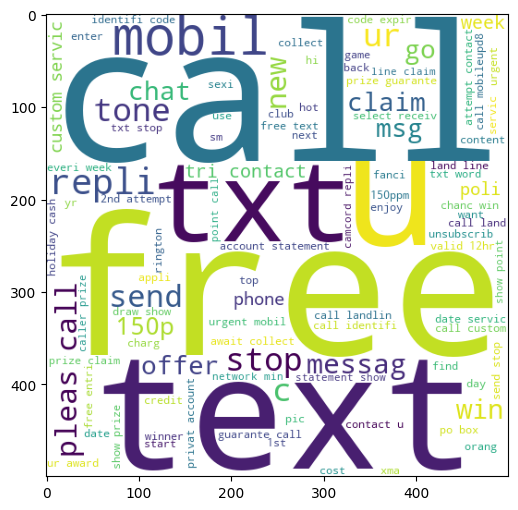

In [134]:
#Spam word cloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(20,6))
plt.imshow(spam_wc)

In [135]:
#Spam messages list
from collections import Counter

spam_list = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for words in msg.split():
        spam_list.append(words)
#len(spam_list)
Counter(spam_list).most_common(10) #Most common spam words

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103)]

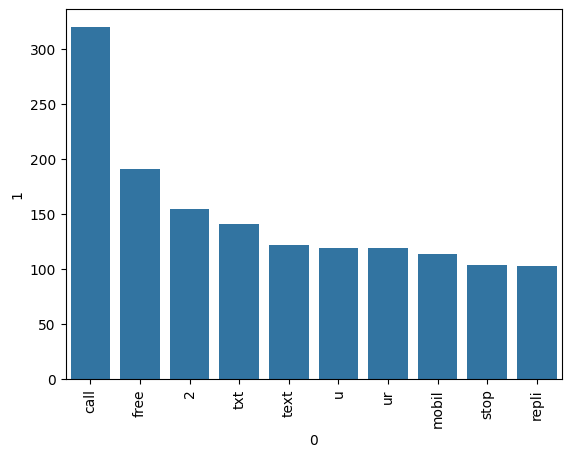

In [136]:
#Top 10 spam words visualization
sns.barplot(x=pd.DataFrame(Counter(spam_list).most_common(10))[0], 
            y=pd.DataFrame(Counter(spam_list).most_common(10))[1])
plt.xticks(rotation='vertical')
plt.show()

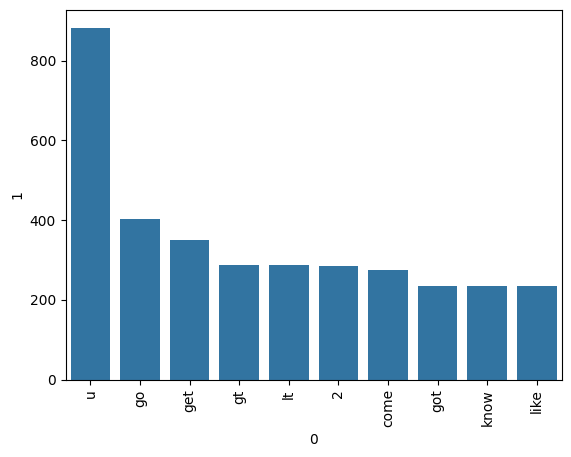

In [137]:
ham_list = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for words in msg.split():
        ham_list.append(words)

Counter(ham_list).most_common(10) #Most common ham words
sns.barplot(x=pd.DataFrame(Counter(ham_list).most_common(10))[0], 
            y=pd.DataFrame(Counter(ham_list).most_common(10))[1])
plt.xticks(rotation='vertical')
plt.show()

Model Building

In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
tfidf = TfidfVectorizer(max_features=3000)

In [141]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [142]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
knc = KNeighborsClassifier()
etc = ExtraTreesClassifier(n_estimators=100, random_state=2)

In [144]:
#Gaussian Naive Bayes
gnb.fit(X_train, y_train)
y_predict1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_predict1))
print(confusion_matrix(y_test, y_predict1))
print(precision_score(y_test, y_predict1))
print(classification_report(y_test, y_predict1))

0.8771760154738878
[[786 110]
 [ 17 121]]
0.5238095238095238
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       896
           1       0.52      0.88      0.66       138

    accuracy                           0.88      1034
   macro avg       0.75      0.88      0.79      1034
weighted avg       0.92      0.88      0.89      1034



In [145]:
#Multinomial Naive Bayes
mnb.fit(X_train, y_train)
y_predict2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_predict2))
print(confusion_matrix(y_test, y_predict2))
print(precision_score(y_test, y_predict2))
print(classification_report(y_test, y_predict2))

0.9787234042553191
[[889   7]
 [ 15 123]]
0.9461538461538461
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       896
           1       0.95      0.89      0.92       138

    accuracy                           0.98      1034
   macro avg       0.96      0.94      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [146]:
#Bernoulli Naive Bayes
bnb.fit(X_train, y_train)
y_predict3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_predict3))
print(confusion_matrix(y_test, y_predict3))
print(precision_score(y_test, y_predict3))
print(classification_report(y_test, y_predict3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.99      0.88      0.93       138

    accuracy                           0.98      1034
   macro avg       0.99      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034



In [147]:
#K-Nearest Neighbors
knc.fit(X_train, y_train)
y_predict4 = knc.predict(X_test)
print(accuracy_score(y_test, y_predict4))
print(confusion_matrix(y_test, y_predict4))
print(precision_score(y_test, y_predict4))
print(classification_report(y_test, y_predict4))

0.9042553191489362
[[895   1]
 [ 98  40]]
0.975609756097561
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       896
           1       0.98      0.29      0.45       138

    accuracy                           0.90      1034
   macro avg       0.94      0.64      0.70      1034
weighted avg       0.91      0.90      0.88      1034



In [148]:
#Extra Trees Classifier
etc.fit(X_train, y_train)
y_predict5 = etc.predict(X_test)
print(accuracy_score(y_test, y_predict5))
print(confusion_matrix(y_test, y_predict5))
print(precision_score(y_test, y_predict5))
print(classification_report(y_test, y_predict5))

0.9787234042553191
[[893   3]
 [ 19 119]]
0.9754098360655737
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.98      0.86      0.92       138

    accuracy                           0.98      1034
   macro avg       0.98      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [149]:
classifiers = {
    'GNB': gnb,
    'MNB': mnb,
    'BNB': bnb,
    'KNC': knc,
    'ETC': etc,
}


def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision


accuracy_scores = []
precision_scores = []
classifier_names = []


for name, clf in classifiers.items():
    curr_accuracy, curr_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print(name)
    print("Accuracy:", curr_accuracy)
    print("Precision:", curr_precision)
    print()
    
    classifier_names.append(name)
    accuracy_scores.append(curr_accuracy)
    precision_scores.append(curr_precision)
plt.figure(figsize=(10,5))

GNB
Accuracy: 0.8771760154738878
Precision: 0.5238095238095238

MNB
Accuracy: 0.9787234042553191
Precision: 0.9461538461538461

BNB
Accuracy: 0.9835589941972921
Precision: 0.991869918699187

KNC
Accuracy: 0.9042553191489362
Precision: 0.975609756097561

ETC
Accuracy: 0.9787234042553191
Precision: 0.9754098360655737



<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [150]:
performance_df = pd.DataFrame({
    'Classifier': classifier_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values(by='Accuracy', ascending=False)
performance_df

,Classifier,Accuracy,Precision
2,BNB,0.983559,0.991870
4,ETC,0.978723,0.975410
1,MNB,0.978723,0.946154
3,KNC,0.904255,0.975610
0,GNB,0.877176,0.523810


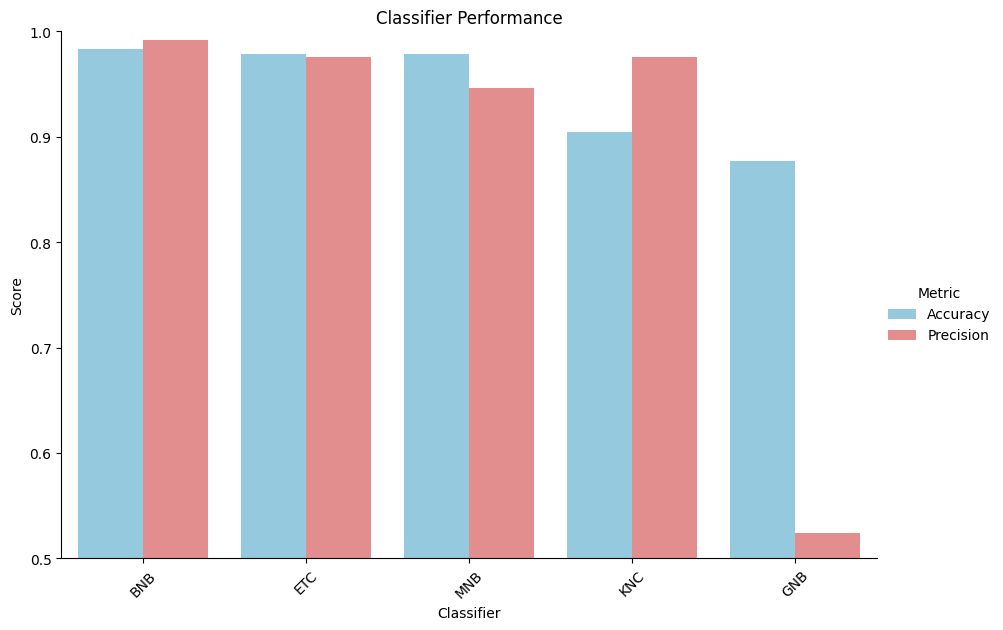

In [151]:
#Melting into long format
performance_df_melted = pd.melt(
    performance_df, 
    id_vars=['Classifier'], 
    value_vars=['Accuracy', 'Precision'],
    var_name='Metric', 
    value_name='Value'
)

g = sns.catplot(
    x='Classifier', 
    y='Value', 
    hue='Metric', 
    data=performance_df_melted, 
    kind='bar',
    dodge=True,
    height=6, 
    aspect=1.5,
    palette={'Accuracy': 'skyblue', 'Precision': 'lightcoral'}
)

plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.title('Classifier Performance')
plt.ylabel('Score')
plt.show()